In [2]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
 from google.colab import drive
 drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data_train = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist_train.csv')
data_test = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist_test.csv')

In [5]:
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [7]:
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [8]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))

In [10]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
cnn3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [12]:
history3 = cnn3.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
188/188 [==============================] - 35s 12ms/step - loss: 1.2860 - accuracy: 0.5256 - val_loss: 0.5435 - val_accuracy: 0.7912
Epoch 2/10
188/188 [==============================] - 2s 9ms/step - loss: 0.5737 - accuracy: 0.7853 - val_loss: 0.4285 - val_accuracy: 0.8399
Epoch 3/10
188/188 [==============================] - 2s 9ms/step - loss: 0.4772 - accuracy: 0.8214 - val_loss: 0.3832 - val_accuracy: 0.8608
Epoch 4/10
188/188 [==============================] - 2s 9ms/step - loss: 0.4219 - accuracy: 0.8460 - val_loss: 0.3528 - val_accuracy: 0.8686
Epoch 5/10
188/188 [==============================] - 2s 9ms/step - loss: 0.3904 - accuracy: 0.8564 - val_loss: 0.3321 - val_accuracy: 0.8785
Epoch 6/10
188/188 [==============================] - 2s 9ms/step - loss: 0.3649 - accuracy: 0.8679 - val_loss: 0.3125 - val_accuracy: 0.8842
Epoch 7/10
188/188 [==============================] - 2s 9ms/step - loss: 0.3455 - accuracy: 0.8753 - val_loss: 0.3079 - val_accuracy: 0.8867
Epoc

In [13]:
score3 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.2609056234359741
Test accuracy: 0.9021999835968018


In [14]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [15]:

history3 = cnn3.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
187/187 [==============================] - 15s 77ms/step - loss: 0.4875 - accuracy: 0.8178 - val_loss: 0.3910 - val_accuracy: 0.8494
Epoch 2/50
187/187 [==============================] - 15s 77ms/step - loss: 0.4443 - accuracy: 0.8340 - val_loss: 0.3761 - val_accuracy: 0.8613
Epoch 3/50
187/187 [==============================] - 14s 77ms/step - loss: 0.4245 - accuracy: 0.8412 - val_loss: 0.3676 - val_accuracy: 0.8617
Epoch 4/50
187/187 [==============================] - 15s 78ms/step - loss: 0.4135 - accuracy: 0.8472 - val_loss: 0.3437 - val_accuracy: 0.8697
Epoch 5/50
187/187 [==============================] - 15s 78ms/step - loss: 0.4050 - accuracy: 0.8499 - val_loss: 0.3433 - val_accuracy: 0.8725
Epoch 6/50
187/187 [==============================] - 14s 77ms/step - loss: 0.3936 - accuracy: 0.8538 - val_loss: 0.3354 - val_accuracy: 0.8718
Epoch 7/50
187/187 [==============================] - 15s 77ms/step - loss: 0.3861 - accuracy: 0.8565 - val_loss: 0.3255 - val_accuracy:

In [16]:
score3 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.22683723270893097
Test accuracy: 0.9110999703407288


In [17]:
history3_dict = history3.history
history3_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

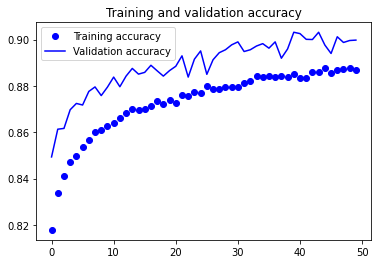

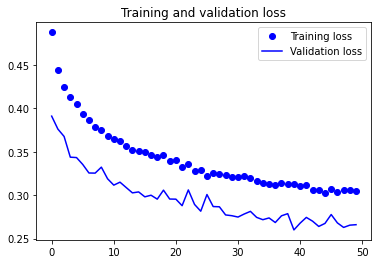

In [18]:

import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()